# Plot Summary Ancient Sardinians
Plot Summary Statistic per ancient Sardinian

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
meta_path = "../../../ancient-sardinia/output/meta/meta_final.csv"
#anc_ind = 1029  # Up to which individual there are ancestrals
# Nr of ancient Sarinian individuals

In [168]:
def get_ancient_sardinians(meta_path, min_cov=0.5, anc_sardind = 57):
    """Return a Pandas Dataframe of Summary Data for the ancient Sardinians"""
    meta_df = pd.read_csv(meta_path)  # Load the Meta File
    as_df = meta_df[:anc_sardind]
    as_df = as_df[as_df["mean_cov"]>=1.2]
    return as_df

def load_rohs(iid, path_folder = "../../Empirical/AncSards/"):
    """Load the ROH Dataframe for Individual iid"""
    
    roh_dfs = []
    
    for ch in np.arange(1,23):
        path = path_folder +  iid + "_1000G_ROH/chr" + str(ch) + "/roh.csv"
        roh = pd.read_csv(path)
        roh_dfs.append(roh)
    
    df_roh = pd.concat(roh_dfs)
    return df_roh

def post_process_roh_df(df, min_cm=4, snp_cm=100, output=True):
    """Post Process ROH Dataframe.
    min_cm: Minimum Length in CentiMorgan
    snp_cm: How many SNPs per CentiMorgan"""
    densities = df["length"] / (df["lengthM"] * 100)
    densities_ok = (densities > snp_cm)
    
    df["SNP_Dens"] = densities
    
    # Filter for SNP Density:
    df = df[densities_ok]
    
    # Filter for Length:
    length_okay = (df["lengthM"] * 100) > min_cm
    
    if output==True:
        print(f"Min SNPs per cM> {snp_cm}: {np.sum(densities_ok)}/{len(densities_ok)}")
        print(f"> {min_cm} cM: {np.sum(length_okay)}/{len(length_okay)}")
    
    df = df[length_okay]
    return df

def individual_roh_statistic(df, output=True):
    """Gives out Summary statistic of ROH df"""
    if len(df)==0:   # If no ROH Block found
        max_roh, sum_roh, n_roh = 0, 0, 0
    
    else:
        max_roh = np.max(df["lengthM"])
        sum_roh = np.sum(df["lengthM"])
        n_roh = len(df["lengthM"])
     
    if output==True:
        print(f"Max. ROH: {max_roh * 100:.3f}")
        print(f"Sum. ROH: {sum_roh * 100:.3f}")
        print(f"Nr. ROH: {n_roh}") 
    
    return max_roh, sum_roh, n_roh

### Prepare the Data:
def create_ancsard_df(output=False, save=True, savepath = "../../Empirical/AncSards/roh_summary.csv"):
    """Create the Ancient Sardinian Summary Dataframe"""
    meta_df = get_ancient_sardinians(meta_path, min_cov=0.5)
    iids = meta_df["iid"]
    n = len(iids)

    max_roh = np.zeros(n, dtype="float")
    sum_roh = np.zeros(n, dtype="float")
    n_roh = np.zeros(n, dtype="int")

    for i, iid in  enumerate(iids):
        df_roh = load_rohs(iid)
        df_roh = post_process_roh_df(df_roh, output=output)  ### Do the Postprocessing
        max_roh[i], sum_roh[i], n_roh[i] = individual_roh_statistic(df_roh, output=output)

    ### Create the Dataframe:
    d = {"iid": iids, "max_roh": max_roh*100, "sum_roh" : sum_roh*100, "n_roh" : n_roh}
    df1 = pd.DataFrame(d).sort_values(by="sum_roh", ascending=False)  # Sort output
    
    if save == True:
        df1.to_csv(savepath, sep=",", index=False)
        print(f"Saved to: {savepath}")
        
    return df1

In [169]:
df1 = create_ancsard_df()

Saved to: ../../Empirical/AncSards/roh_summary.csv


In [170]:
df1

,iid,max_roh,sum_roh,n_roh
37,MA89,40.237296,378.719322,30
11,SEC006,29.482806,71.634997,7
13,SEC005,14.849401,52.890004,7
10,SEC002,15.865899,33.987910,4
48,MA79,8.478797,29.680901,6
38,ISC001,14.681399,19.497192,2
45,ORC009,12.144303,17.739600,2
31,ORC001,12.046300,17.344604,2
18,SUC004,11.579394,15.799701,2
52,SUC008,8.201498,13.266796,2


### Do the Figure:

In [227]:
def plot_sard_inbreed(savepath = "../../Empirical/AncSards/roh_summary.pdf", save=True):
    fsl = 14
    
    df1 = create_ancsard_df()
    x,y = df1["sum_roh"].values, df1["n_roh"].values

    plt.figure(figsize=(6,6))
    plt.scatter(x,y , c="royalblue", edgecolors="k", s=70)
    plt.xlabel("Sum ROH >4 cM", fontsize=fsl)
    plt.ylabel("Nr ROH >4 cM", fontsize=fsl)
    plt.title("Consanguinity in ancient Sardinians", fontsize=fsl)

    for i, txt in enumerate(df1["iid"]):
        plt.annotate(txt, (x[i]-15, y[i]-1.5), fontsize=8)
    
    if save==True:
        plt.savefig(savepath, bbox_inches = 'tight', pad_inches = 0)
        print(f"Saved to {savepath}")
    plt.show()

Saved to: ../../Empirical/AncSards/roh_summary.csv


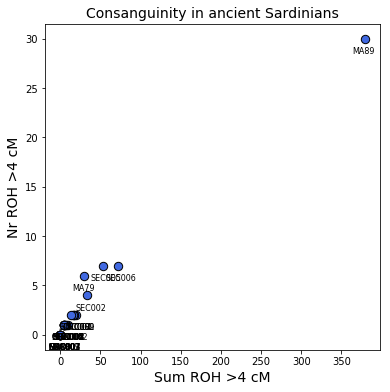

In [228]:
plot_sard_inbreed(save=False)

# Area 51

In [84]:
df_roh

Min SNPs per cM> 100: 119/128
Longer than > 4 cM: 30/119


,Start,End,StartM,EndM,length,lengthM,iid,ch,SNP_Dens
0,4126,7452,0.263204,0.414637,3326,0.151433,MA89,2,219.635101
4,34368,37616,1.307488,1.420977,3248,0.113489,MA89,2,286.195037
5,51501,54616,1.887808,1.988562,3115,0.100754,MA89,2,309.168805
6,28180,41981,1.067167,1.469540,13801,0.402373,MA89,3,342.990245
0,3716,7013,0.260321,0.372148,3297,0.111827,MA89,4,294.830355
1,8496,10587,0.422381,0.532148,2091,0.109767,MA89,4,190.494428
0,11883,13610,0.562487,0.607636,1727,0.045149,MA89,5,382.511579
7,38445,46472,1.434761,1.699907,8027,0.265146,MA89,5,302.738983
0,84,983,0.010175,0.061576,899,0.051401,MA89,6,174.899321
2,22902,26399,0.953170,1.078923,3497,0.125753,MA89,7,278.084839
